Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def exercise_0(file):
    #Reading the dataset (`transactions.csv`) as a Pandas dataframe.
    df = pd.read_csv(file)
    print(df.head())
    return df

def exercise_1(df):
    #Returning the column names as a list from the dataframe.
    column_names = [col for col in df.columns]
    return column_names

def exercise_2(df, k):
    #Returning the first k rows from the dataframe.
    return df.head(k)

def exercise_3(df, k):
    #Returning a random sample of k rows from the dataframe.
    return df.sample(k)

def exercise_4(df):
    #Obtaining unique values from the 'type' column
    unique_types = df['type'].unique()
    #Converting the unique values to a list using list comprehension
    unique_transactions = [item for item in unique_types]
    return unique_transactions

def exercise_5(df):
    #Counting the frequencies of each transaction destination
    frequency_counts = df['nameDest'].value_counts()
    #Getting the top 10 transaction destinations with their frequencies
    top_10_destinations = frequency_counts.head(10)
    return top_10_destinations

def exercise_6(df):
    #Filtering rows where fraud was detected
    fraud_detected = df[df['isFraud'] == 1]
    return fraud_detected

def exercise_7(df):
    #Grouping by the 'nameOrig' column and counting the number of unique 'nameDest' (destinations) per source
    result = df.groupby('nameOrig')['nameDest'].nunique()
    #Sort the result in descending order
    result = result.sort_values(ascending=False)
    return result.reset_index()


In [6]:
df = exercise_0('transactions.csv')

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [9]:
# Test exercises here
#Call exercise_0 
print("Exercise 0")
df = exercise_0('transactions.csv')
print("\n")

#Call exercise_1 
print("Exercise 1")
column_names = exercise_1(df)
print("Column names list:\n", column_names)
print("\n")

#Call exercise_2
print("Exercise 2")
k=11
first_k_rows = exercise_2(df, k)
print(first_k_rows)
print("\n")

#Call exercise_3
print("Exercise 3")
k = random.randint(1, len(df)) 
first_k_rows = exercise_3(df, k)
print(first_k_rows)
print("\n")

#Call exercise_4
print("Exercise 4")
unique_types = exercise_4(df)
print("Unique transaction:", unique_types)
print("\n")

#Call exercise_5
print("Exercise 5")
top_10_destinations = exercise_5(df)
print("Top 10 transaction destinations with frequencies:")
print("\n")
print(top_10_destinations)
print("\n")

#Call exercise_6
print("Exercise 6")
fraud_rows = exercise_6(df)
print("Rows with fraud detected:")
print("\n")
print(fraud_rows)
print("\n")

#Call exercise_7
print("Exercise 7")
distinct_destinations = exercise_7(df)
print("Number of distinct destinations each source has interacted with:")
print("\n")
print(distinct_destinations)
print("\n")

Exercise 0
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


Exercise 1
Column names list:
 ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newb

Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

'Visual_1(df):\nThe charts show the distribution of transaction types and how they are split by fraud. \nThe first chart shows a general view of the transaction types, \nwhile the second chart highlights the relationship between transaction types and fraud detection. \nIn this case, fraud is detected primarily in the transaction types "CASH_OUT" and "Transfer".'

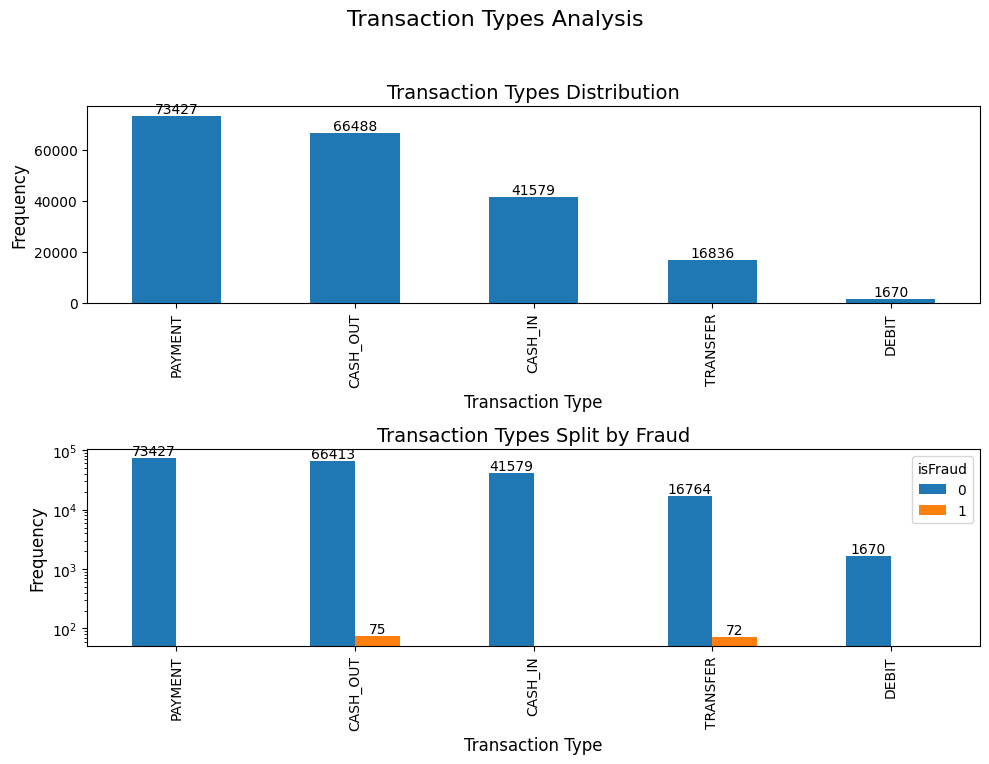

In [10]:
def visual_1(df):
    #note: I had to change bits of the code given in the notebook to better plot the graph
    def transaction_counts(df):
        #Counting the occurrences of each transaction type
        return df['type'].value_counts()

    def transaction_counts_split_by_fraud(df):
        #Useing pivot_table to count occurrences of each transaction type split by fraud
        return df.pivot_table(index='type', columns='isFraud', aggfunc='size', fill_value=0)

    fig, axs = plt.subplots(2, figsize=(10, 8)) 

    #Getting the transaction types in the order of the first chart
    transaction_order = transaction_counts(df).index

    #Transaction types bar chart
    transaction_counts(df).loc[transaction_order].plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types Distribution', fontsize=14)
    axs[0].set_xlabel('Transaction Type', fontsize=12)
    axs[0].set_ylabel('Frequency', fontsize=12)
    
    #Transaction types split by fraud bar chart using the same order of types as the first for better readability 
    transaction_counts_split_by_fraud(df).loc[transaction_order].plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Types Split by Fraud', fontsize=14)
    axs[1].set_xlabel('Transaction Type', fontsize=12)
    axs[1].set_ylabel('Frequency', fontsize=12)
    axs[1].set_yscale('log')
    
    fig.suptitle('Transaction Types Analysis', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    for ax in axs:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10)

    return '''Visual_1(df):
The charts show the distribution of transaction types and how they are split by fraud. 
The first chart shows a general view of the transaction types, 
while the second chart highlights the relationship between transaction types and fraud detection. 
In this case, fraud is detected primarily in the transaction types "CASH_OUT" and "Transfer".'''


visual_1(df)


'Visual_2(df):\nThe scatter plot displays the relationship between the balance delta of the origin and destination accounts\nfor Cash Out transactions. Each point represents a transaction, with its position indicating the change\nin balance for both accounts. This visualization helps in understanding how changes in the origin account balance\nrelate to changes in the destination account balance during Cash Out operations.'

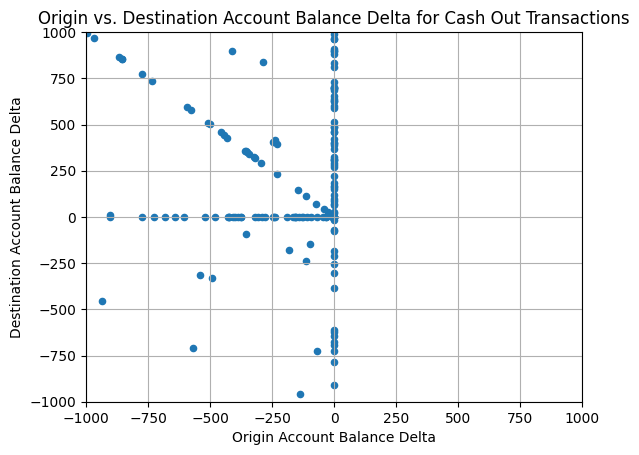

In [11]:
def visual_2(df):
    def query(df):
        # Filtering for Cash Out transactions
        cash_out_df = df[df['type'] == 'CASH_OUT'].copy()  # Make a copy to avoid SettingWithCopyWarning
        
        # Calculating balance delta for origin and destination accounts
        cash_out_df.loc[:, 'orig_delta'] = cash_out_df['newbalanceOrig'] - cash_out_df['oldbalanceOrg']
        cash_out_df.loc[:, 'dest_delta'] = cash_out_df['newbalanceDest'] - cash_out_df['oldbalanceDest']
        
        return cash_out_df[['orig_delta', 'dest_delta']]
    
    # Generating scatter plot
    plot = query(df).plot.scatter(x='orig_delta', y='dest_delta')
    plot.set_title('Origin vs. Destination Account Balance Delta for Cash Out Transactions')
    plot.set_xlabel('Origin Account Balance Delta')
    plot.set_ylabel('Destination Account Balance Delta')
    
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)

    # Added gridlines for easier visualization
    plot.grid(True)

    return ('''Visual_2(df):
The scatter plot displays the relationship between the balance delta of the origin and destination accounts
for Cash Out transactions. Each point represents a transaction, with its position indicating the change
in balance for both accounts. This visualization helps in understanding how changes in the origin account balance
relate to changes in the destination account balance during Cash Out operations.''')

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

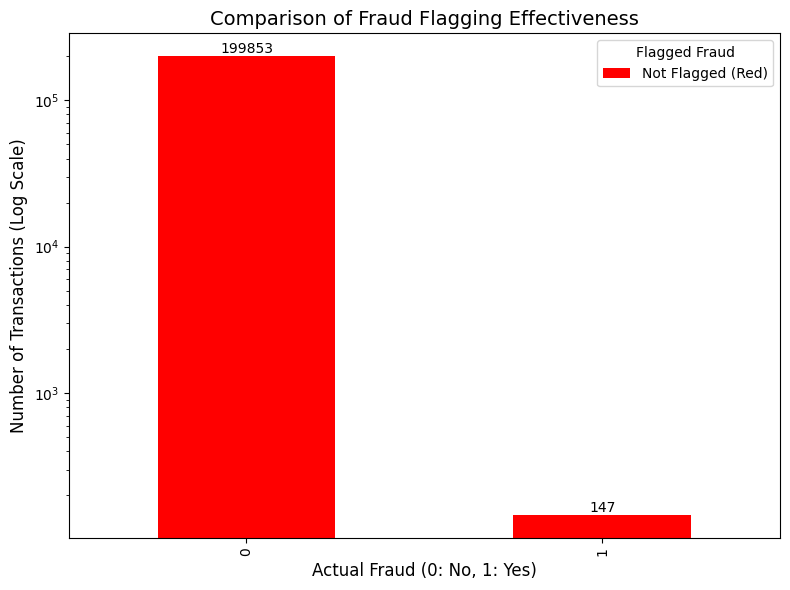

'visual_custom(df):\nThe chart compares the number of transactions that were flagged as fraudulent versus those that were actually fraudulent. \nThe purpose of this chart is to compare the transactions with fraudulent transactions (isFraud) to see if the flagging \nmechanism is effective or if there are discrepancies. In this case out of 200000 data only 147 were actual fraud and out of\nthose 147 fraudulent data none were flagged as fraudulent. '

In [13]:
def exercise_custom(df):
    #Grouping by the fraud and flagged fraud columns
    flagged_fraud_counts = df.groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='Count')
    return flagged_fraud_counts

def visual_custom(df):
    #Getting the counts of flagged and actual fraud from the function exercise_custom(df)
    flagged_fraud_counts = exercise_custom(df)
    #Creating a pivot table 
    pivot_table = flagged_fraud_counts.pivot(index='isFraud', columns='isFlaggedFraud', values='Count').fillna(0)

    #Plotting the results
    fig, ax = plt.subplots(figsize=(8, 6))
    
    #Seting logarithmic scale for better visibility of small values as the number of actual fraud is very small
    ax.set_yscale('log')

    #Plotting the data with different colors for non-flagged (red) and flagged (blue) fraud cases
    pivot_table.plot(kind='bar', stacked=True, ax=ax, color=['red', 'blue'])

    ax.set_title('Comparison of Fraud Flagging Effectiveness', fontsize=14)
    ax.set_xlabel('Actual Fraud (0: No, 1: Yes)', fontsize=12)
    ax.set_ylabel('Number of Transactions (Log Scale)', fontsize=12)

    #A custom legend with specific labels for colors
    ax.legend(['Not Flagged (Red)', 'Flagged Fraud (Blue)'], title='Flagged Fraud', fontsize=10)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    return '''visual_custom(df):
The chart compares the number of transactions that were flagged as fraudulent versus those that were actually fraudulent. 
The purpose of this chart is to compare the transactions with fraudulent transactions (isFraud) to see if the flagging 
mechanism is effective or if there are discrepancies. In this case out of 200000 data only 147 were actual fraud and out of
those 147 fraudulent data none were flagged as fraudulent. '''

visual_custom(df)


Extra information for whoever reads my code

For the custom exercise, I initially intended to create a bar chart to show the origin and destination accounts with the 
highest number of fraud incidents. However, most accounts had only committed fraud once, which rendered this chart less meaningful. 
In fraud detection, it's common for perpetrators to use multiple accounts to spread their fraudulent activities, 
making detection more challenging. Therefore, I decided to shift the focus of the chart to evaluate the effectiveness of the isFraud mechanism.

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.